## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras
import sklearn
from sklearn.preprocessing import MinMaxScaler
# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dick\Anaconda3

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test

In [6]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x_orig_shape = x.shape
    scaler = MinMaxScaler(feature_range=(-1, 1))
    x = scaler.fit_transform(x.reshape((len(x), -1)))
    if flatten:
        return x
    return x.reshape(x_orig_shape)

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16, 8]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 320us/step - loss: 2.0002 - acc: 0.2818 - val_loss: 1.8013 - val_acc: 0.3694
Epoch 2/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.6577 - acc: 0.4180 - val_loss: 1.5542 - val_acc: 0.4540
Epoch 3/100
50000/50000 [==============================] - 9s 190us/step - loss: 1.4939 - acc: 0.4754 - val_loss: 1.4906 - val_acc: 0.4814
Epoch 4/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.3806 - acc: 0.5161 - val_loss: 1.4338 - val_acc: 0.4988
Epoch 5/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.2982 - acc: 0.5466 - val_loss: 1.3964 - val_acc: 0.5182
Epoch 6/100
50000/50000 [==============================] - 9s 188us/step - loss: 1.2201 - acc: 0.5746 - val_loss: 1.3920 - val_acc: 0.5175
Epoch 7/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.1422 - acc: 0.5992 - val_loss: 

50000/50000 [==============================] - 9s 185us/step - loss: 0.1303 - acc: 0.9574 - val_loss: 3.4758 - val_acc: 0.5308
Epoch 59/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.1080 - acc: 0.9646 - val_loss: 3.6403 - val_acc: 0.5264
Epoch 60/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.0805 - acc: 0.9732 - val_loss: 3.7434 - val_acc: 0.5217
Epoch 61/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.1041 - acc: 0.9649 - val_loss: 3.6155 - val_acc: 0.5291
Epoch 62/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.0888 - acc: 0.9707 - val_loss: 3.7250 - val_acc: 0.5323
Epoch 63/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.0965 - acc: 0.9690 - val_loss: 3.7460 - val_acc: 0.5260
Epoch 64/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.0996 - acc: 0.9671 - val_loss: 3.7235 - val_acc: 0.5391
Epoch 65/100
50000/50000 [=======

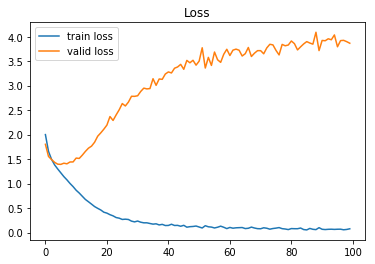

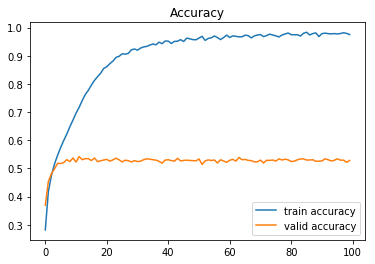

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()